In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#data.drop('id', axis=1, inplace = True)
#data.drop('Unnamed: 32', axis =1 ,inplace =True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
#Encode the diagnosis malignant as 1 and benign as 0
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
data['diagnosis'].unique()

array([1, 0])

In [ ]:
# Separate features and labels
features = data.drop('diagnosis', axis=1)
labels = data['diagnosis']

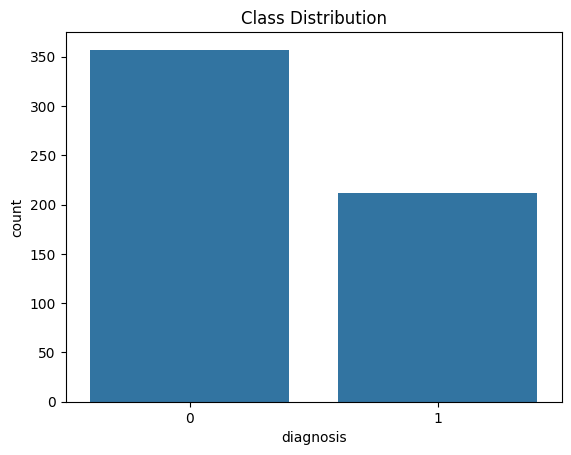

In [ ]:
# Visualize class distribution
sns.countplot(x=labels)
plt.title('Class Distribution')
plt.show()


<Axes: >

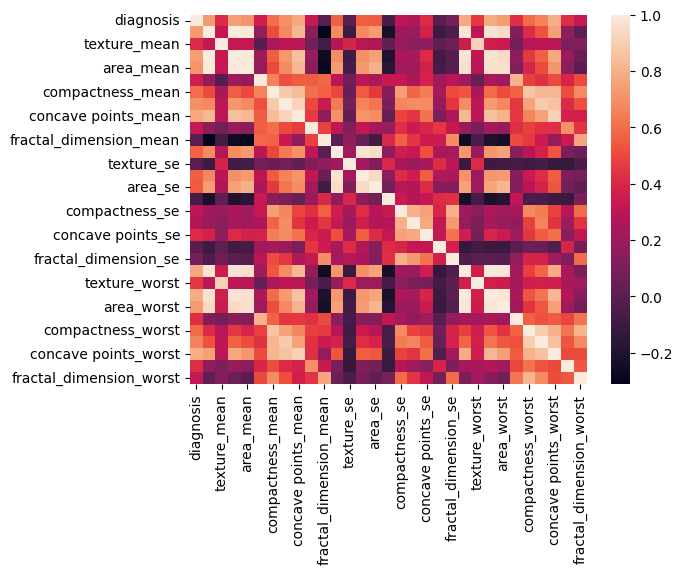

In [ ]:
sns.heatmap(data.corr())

##Applying Data Augmentation techniques

In [ ]:
random_seed = 42
np.random.seed(random_seed)

In [ ]:
#By adding Gaussian Noise
def add_gaussian_noise(data, mean=0, std=0.1):
    noise = np.random.normal(mean, std, data.shape)
    return data + noise

augmented_data_noise = add_gaussian_noise(features)

In [ ]:
#by data scaling
def scale_data(data, min_scale=0.9, max_scale=1.1):
    scale = np.random.uniform(min_scale, max_scale, data.shape)
    return data * scale

augmented_data_scaled = scale_data(features)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
augmented_features_smote, augmented_labels_smote = smote.fit_resample(features, labels)

In [ ]:
# Convert augmented data to DataFrame
augmented_data_noise_df = pd.DataFrame(augmented_data_noise, columns=features.columns)
augmented_data_noise_df['diagnosis'] = labels.values

augmented_data_scaled_df = pd.DataFrame(augmented_data_scaled, columns=features.columns)
augmented_data_scaled_df['diagnosis'] = labels.values

augmented_features_smote_df = pd.DataFrame(augmented_features_smote, columns=features.columns)
augmented_features_smote_df['diagnosis'] = augmented_labels_smote

# Combine all data
augmented_data = pd.concat([data, augmented_data_noise_df, augmented_data_scaled_df, augmented_features_smote_df], axis=0)

# Shuffle the combined dataset
augmented_data = augmented_data.sample(frac=1).reset_index(drop=True)

In [ ]:
augmented_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,9.500641e+04,0,13.247977,15.985250,75.962508,431.415238,0.118979,0.103487,0.058852,0.032045,...,14.539444,23.078251,92.423327,501.591133,0.168140,0.189076,0.172154,0.082702,0.317810,0.071351
1,8.844701e+07,1,21.666505,27.729096,145.107775,1474.743705,0.094040,0.184268,0.187999,0.119778,...,28.496550,35.252227,194.444876,2514.689184,0.139666,0.463333,0.515832,0.231804,0.298281,0.092560
2,8.647259e+05,0,9.050713,15.793614,58.717252,245.117606,0.022709,0.329281,0.092698,0.101293,...,9.385584,17.189476,63.429465,269.862714,0.153048,-0.009923,0.159093,0.228237,0.070411,-0.006212
3,8.979756e+05,0,12.227071,16.232455,84.310940,487.685242,0.086127,0.102880,0.048222,0.031682,...,14.010386,21.352841,104.222338,693.312268,0.139799,0.273392,0.211915,0.104160,0.358958,0.085817
4,8.732321e+07,1,16.735232,20.389717,111.102261,867.032871,0.098179,0.156114,0.179940,0.090089,...,18.329047,28.697097,126.863949,1061.233448,0.141769,0.464494,0.586029,0.205775,0.305600,0.094847


In [ ]:
augmented_data= augmented_data.drop('id',axis=1)

In [ ]:
augmented_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2421 entries, 0 to 2420
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                2421 non-null   int64  
 1   radius_mean              2421 non-null   float64
 2   texture_mean             2421 non-null   float64
 3   perimeter_mean           2421 non-null   float64
 4   area_mean                2421 non-null   float64
 5   smoothness_mean          2421 non-null   float64
 6   compactness_mean         2421 non-null   float64
 7   concavity_mean           2421 non-null   float64
 8   concave points_mean      2421 non-null   float64
 9   symmetry_mean            2421 non-null   float64
 10  fractal_dimension_mean   2421 non-null   float64
 11  radius_se                2421 non-null   float64
 12  texture_se               2421 non-null   float64
 13  perimeter_se             2421 non-null   float64
 14  area_se                 

In [ ]:
print(f'Dataset size after adding Gaussian noise: {augmented_data_noise.shape[0]}')
print(f'Dataset size after scaling: {augmented_data_scaled.shape[0]}')
print(f'Dataset size after SMOTE: {augmented_features_smote.shape[0]}')

Dataset size after adding Gaussian noise: 569
Dataset size after scaling: 569
Dataset size after SMOTE: 714


##Visualization

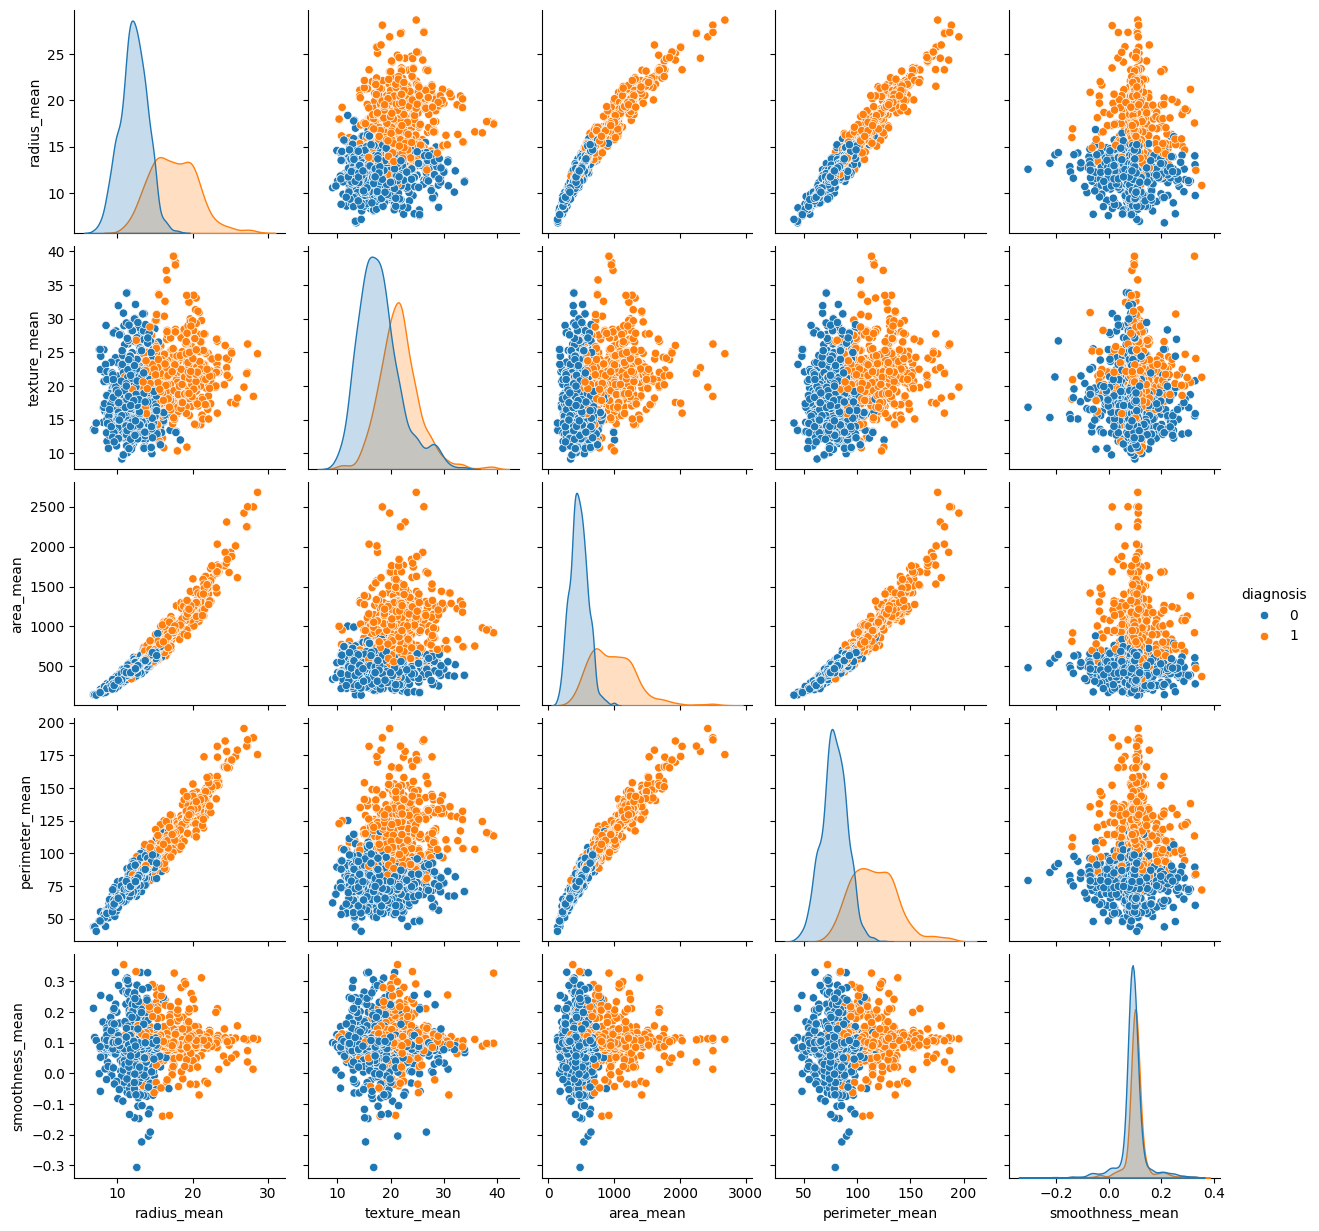

In [ ]:
sns.pairplot(augmented_data, hue = 'diagnosis', vars = ['radius_mean', 'texture_mean', 'area_mean', 'perimeter_mean', 'smoothness_mean'] )

<Axes: ylabel='count'>

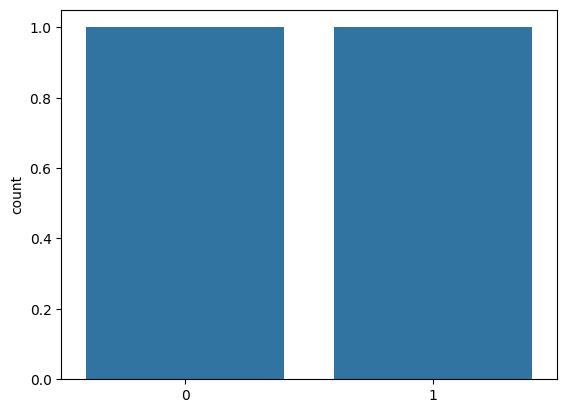

In [ ]:
sns.countplot(augmented_data['diagnosis'].unique())

<Axes: xlabel='area_mean', ylabel='smoothness_mean'>

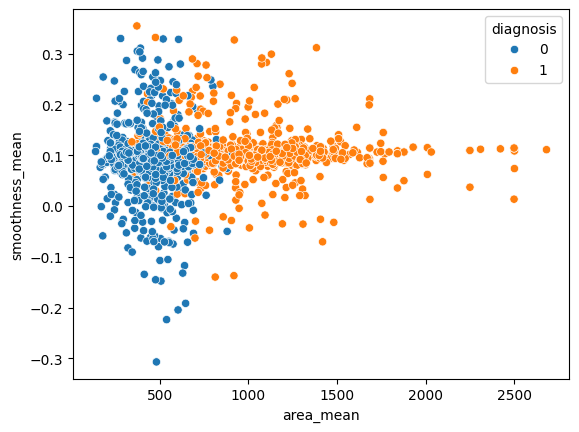

In [ ]:
sns.scatterplot(x = 'area_mean', y = 'smoothness_mean', hue = 'diagnosis', data = augmented_data)

<Axes: >

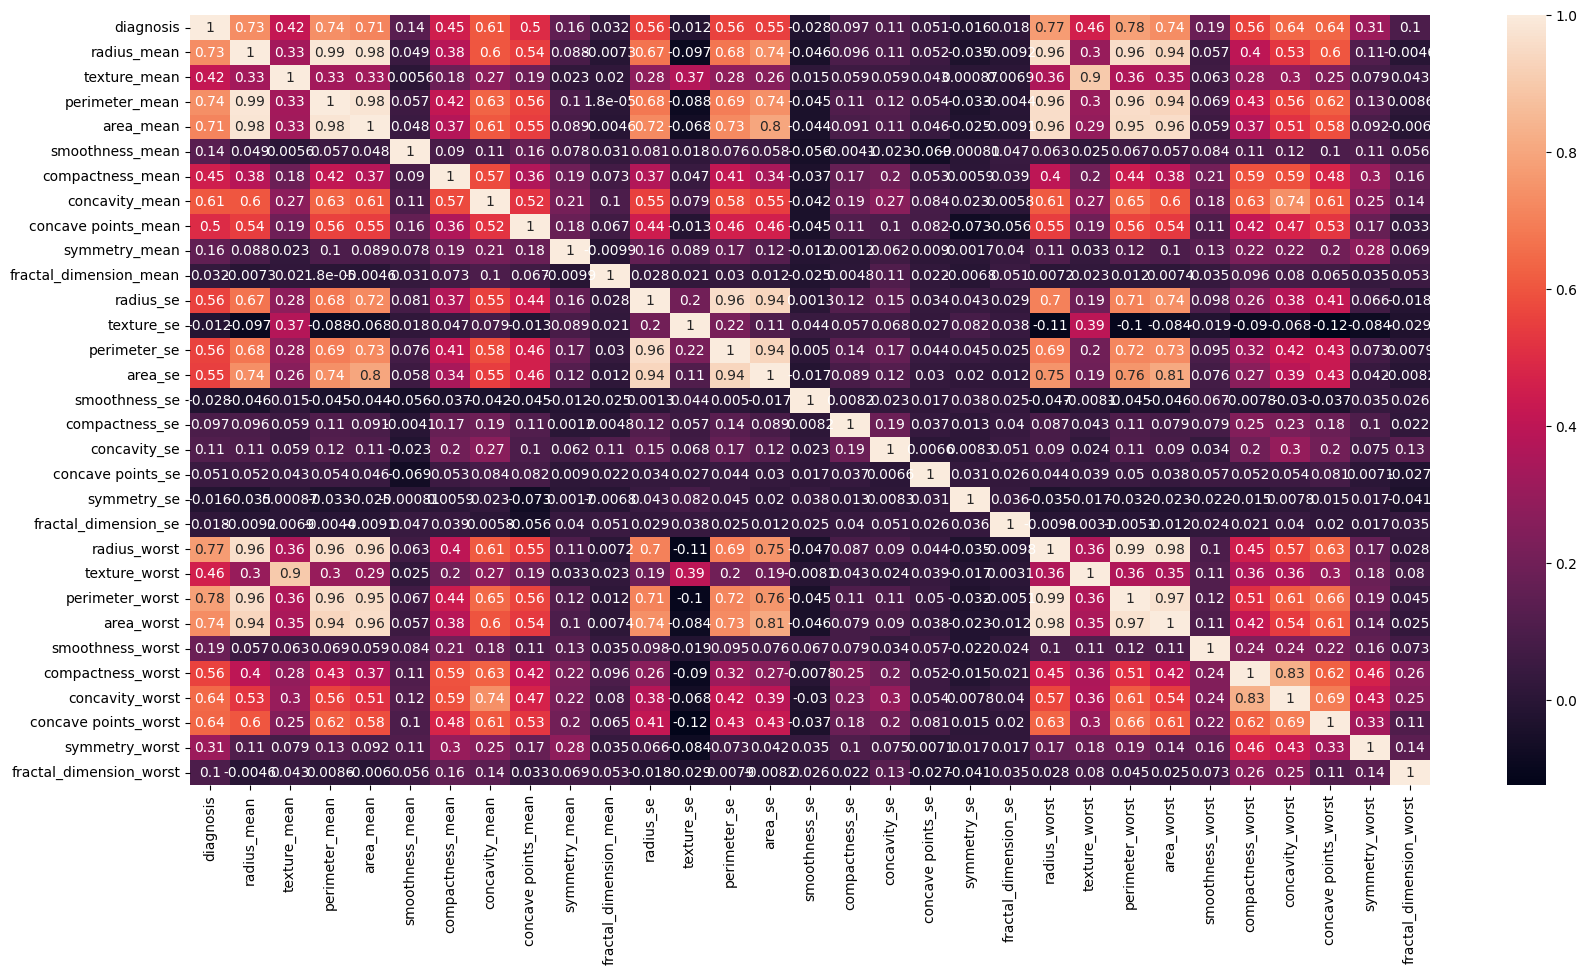

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(augmented_data.corr(), annot=True)

#Model Training with **SVM**

In [ ]:
# Let's drop the target label coloumns
X = augmented_data.drop(['diagnosis'],axis=1)
y = augmented_data['diagnosis']

from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.40, random_state=42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size = 0.50, random_state=42, stratify=y_temp)

In [ ]:
X_train.shape

(1452, 30)

In [ ]:
X_test.shape

(484, 30)

In [ ]:
X_val.shape

(485, 30)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

#Model evaluation with **SVM**

In [ ]:
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

In [ ]:
cm

array([[273,  13],
       [ 27, 171]])

<Axes: >

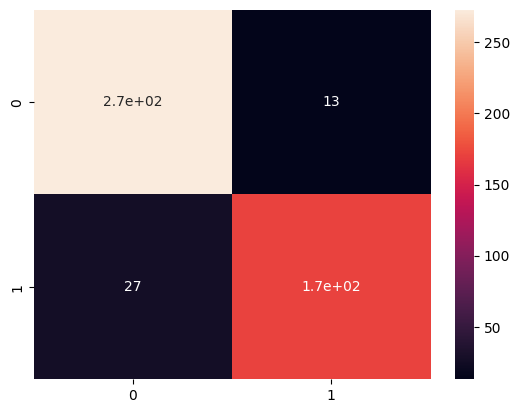

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       286
           1       0.93      0.86      0.90       198

    accuracy                           0.92       484
   macro avg       0.92      0.91      0.91       484
weighted avg       0.92      0.92      0.92       484



#Improving the model by **GridSearchCV**

In [ ]:
min_train = X_train.min()
min_train
range_train = (X_train - min_train).max()
range_train
X_train_scaled = (X_train - min_train)/range_train

In [ ]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [ ]:
param_grid = {'C': [0.65,0.75,0.8,1], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train_scaled,y_train)



Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .......C=0.65, gamma=1, kernel=rbf;, score=0.983 total time=   0.1s
[CV 2/5] END .......C=0.65, gamma=1, kernel=rbf;, score=0.959 total time=   0.1s
[CV 3/5] END .......C=0.65, gamma=1, kernel=rbf;, score=0.972 total time=   0.1s
[CV 4/5] END .......C=0.65, gamma=1, kernel=rbf;, score=0.976 total time=   0.0s
[CV 5/5] END .......C=0.65, gamma=1, kernel=rbf;, score=0.948 total time=   0.0s
[CV 1/5] END .....C=0.65, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.1s
[CV 2/5] END .....C=0.65, gamma=0.1, kernel=rbf;, score=0.938 total time=   0.1s
[CV 3/5] END .....C=0.65, gamma=0.1, kernel=rbf;, score=0.955 total time=   0.1s
[CV 4/5] END .....C=0.65, gamma=0.1, kernel=rbf;, score=0.962 total time=   0.1s
[CV 5/5] END .....C=0.65, gamma=0.1, kernel=rbf;, score=0.945 total time=   0.1s
[CV 1/5] END ....C=0.65, gamma=0.01, kernel=rbf;, score=0.938 total time=   0.2s
[CV 2/5] END ....C=0.65, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.65, 0.75, 0.8, 1],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             verbose=4)

In [ ]:
grid.best_estimator_

SVC(C=0.65, gamma=1)

In [ ]:
grid.best_params_

{'C': 0.65, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
grid_predictions = grid.predict(X_test_scaled)

In [ ]:
confusion_matrix(y_test, grid_predictions)

array([[277,   9],
       [  7, 191]])

<Axes: >

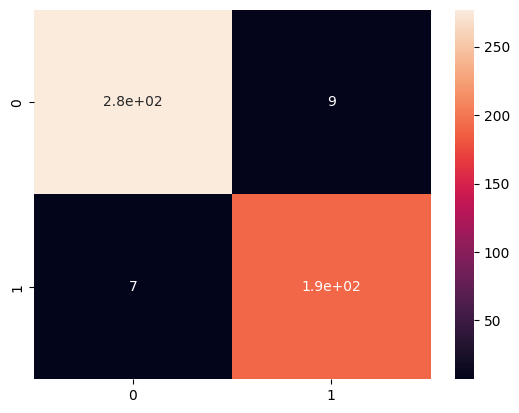

In [ ]:
sns.heatmap(confusion_matrix(y_test, grid_predictions),annot=True)

In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       286
           1       0.95      0.96      0.96       198

    accuracy                           0.97       484
   macro avg       0.97      0.97      0.97       484
weighted avg       0.97      0.97      0.97       484



#Model Training With **DNN**

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(30 , activation='relu', input_dim=30))
classifier.add(Dropout(rate=0.1))

# Adding the second hidden layer
classifier.add(Dense(570, activation='relu'))
classifier.add(Dropout(rate=0.1))

# Adding the output layer
classifier.add(Dense(1, activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#Optimizer is chosen as adam for gradient descent and Binary_crossentropy is the loss function used.

# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=300, batch_size=50, callbacks=[
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
])

y_test_pred_prob = classifier.predict(X_test).ravel()
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'ROC AUC: {roc_auc}')
#y_pred = classifier.predict(X_test)
#y_pred = (y_pred > 0.5)

Epoch 1/300
30/30 [==============================] - 1s 11ms/step - loss: 8.4853 - accuracy: 0.5640 - val_loss: 1.2023 - val_accuracy: 0.6619
Epoch 2/300
30/30 [==============================] - 0s 4ms/step - loss: 3.5178 - accuracy: 0.6343 - val_loss: 0.5525 - val_accuracy: 0.8763
Epoch 3/300
30/30 [==============================] - 0s 4ms/step - loss: 2.1784 - accuracy: 0.7355 - val_loss: 0.6163 - val_accuracy: 0.8825
Epoch 4/300
30/30 [==============================] - 0s 5ms/step - loss: 1.9966 - accuracy: 0.7631 - val_loss: 0.5985 - val_accuracy: 0.8969
Epoch 5/300
30/30 [==============================] - 0s 4ms/step - loss: 1.5995 - accuracy: 0.8023 - val_loss: 0.9013 - val_accuracy: 0.8619
Epoch 6/300
30/30 [==============================] - 0s 4ms/step - loss: 1.3191 - accuracy: 0.8299 - val_loss: 0.7133 - val_accuracy: 0.9052
Epoch 7/300
30/30 [==============================] - 0s 4ms/step - loss: 1.1521 - accuracy: 0.8629 - val_loss: 0.6730 - val_accuracy: 0.9072
Epoch 8/300


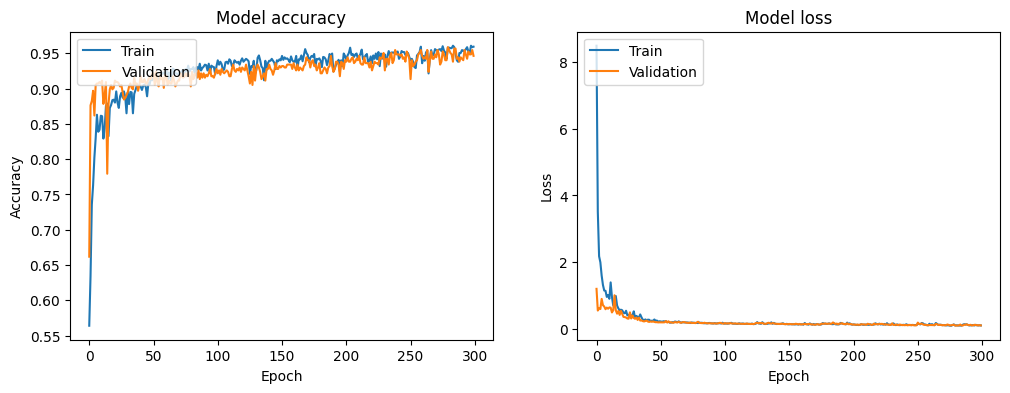

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


#K Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# model predictions

y_pred = knn.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, knn.predict(X_train)))

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)

0.9538567493112947
0.9421487603305785


In [ ]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[274  12]
 [ 16 182]]


In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       286
           1       0.94      0.92      0.93       198

    accuracy                           0.94       484
   macro avg       0.94      0.94      0.94       484
weighted avg       0.94      0.94      0.94       484



#Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(criterion='entropy', max_depth=11, max_features='auto',
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [ ]:
y_pred = rand_clf.predict(X_test)


In [ ]:
# accuracy score

print(accuracy_score(y_train, rand_clf.predict(X_train)))

ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

1.0
0.9855371900826446


In [ ]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[284   2]
 [  5 193]]


In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       286
           1       0.99      0.97      0.98       198

    accuracy                           0.99       484
   macro avg       0.99      0.98      0.99       484
weighted avg       0.99      0.99      0.99       484

